# Load Specter Embeddings

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from pathlib import PurePath


VECTOR_DOWNSAMPLED = 192

## 1. Load Embeddings

In [2]:
VECTOR_COLS = [str(i) for i in range(768)]
COLUMNS = ['cord_uid'] + VECTOR_COLS
spector_path = PurePath('../data/CORD-19-research-challenge') / "cord_19_embeddings_4_24/cord_19_embeddings_4_24.csv"
%time embeddings = pd.read_csv(spector_path, names=COLUMNS).set_index('cord_uid')
embeddings

Wall time: 8.27 s


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
cord_uid,,,,,,,,,,,,,,,,,,,,,
zjufx4fo,2.721076,-0.431015,2.179080,6.504300,-0.202242,-0.894725,2.972502,-3.347002,-0.064544,1.322008,...,-2.130265,0.783100,4.464694,4.126187,0.616837,-5.794294,3.973725,9.372234,-0.950782,-3.712291
ymceytj3,-3.008021,-3.244696,2.470925,3.763625,2.432624,1.219453,3.796769,2.598069,2.884979,2.418602,...,-2.472156,1.338213,5.183721,3.782750,-0.530382,-5.151297,5.128280,-0.275905,1.307766,-2.170676
wzj2glte,-2.046325,-5.428809,0.887669,8.003311,3.319503,0.309435,3.318618,-0.689409,0.252213,0.536973,...,-2.982834,2.380235,5.701175,4.652854,2.417212,-2.621239,2.640825,5.099809,0.854547,0.672836
2sfqsfm1,-3.320630,-2.999981,3.270870,5.732957,1.597287,1.387543,2.019590,3.378376,4.065073,1.243640,...,0.372228,3.600614,4.572679,2.907458,-1.078928,-1.780673,4.568945,6.756433,1.223999,-0.669526
i0zym7iq,-1.073336,-3.112492,1.671631,5.474703,1.090106,-2.130239,3.688148,-2.712460,3.241568,1.191599,...,-1.386332,0.287968,3.418546,2.933281,0.099831,-4.517235,4.460834,5.345471,-0.666389,-2.908341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rn4gm3sc,-4.689072,-4.791936,-0.068950,6.289282,0.938719,2.329439,2.378824,5.083627,1.980937,1.012118,...,-1.236914,3.042387,5.289019,7.036485,-1.655981,-2.413486,3.465397,4.137873,0.993622,-0.168075
l5oecoot,3.562932,-6.777713,0.846920,10.393702,3.292950,-2.245402,0.443532,2.888414,-0.178504,0.374679,...,2.926197,3.866943,-0.921967,2.260824,-3.394212,-8.426849,-0.566379,1.959484,-2.378530,-1.481820
i4acg2ex,-0.888248,-2.974631,-0.078959,1.495192,-3.207374,-0.126922,2.384983,3.904581,-3.744410,1.642316,...,-1.940170,1.040537,1.980522,1.343986,-2.844445,0.057243,3.882662,3.017972,-5.167302,-0.673317


In [3]:
embeddings.shape

(57366, 768)

## 2. Downsample Document Vectors

In [4]:
import numpy as np
from sklearn.decomposition import PCA
RANDOM_STATE = 42
N_CLUSTERS = 6
def kmean_labels(docvectors, n_clusters=6, random_state=RANDOM_STATE):
    print('Setting cluster labels')
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=n_clusters,
                    random_state=random_state).fit(docvectors)
    return kmeans.labels_, kmeans


def downsample(docvectors, dimensions=2):
    print(f'Downsampling to {dimensions}D embeddings')
    pca = PCA(n_components=dimensions, svd_solver='full')
    docvectors_downsampled = pca.fit_transform(docvectors)
    return np.squeeze(docvectors_downsampled), pca

In [5]:
vectors_downsampled, pca_downsampled = downsample(embeddings,VECTOR_DOWNSAMPLED)

Downsampling to 192D embeddings


## 2. Create Full Spector Annoy Index

In [6]:
from annoy import AnnoyIndex
from pathlib import Path

def cord_support_dir():
    return Path('../cord') / 'cordsupport'

def create_annoy_index(vectors, num_trees=30):
    print('Building Annoy index from vectors', vectors.shape)
    num_papers, vector_length = vectors.shape
    annoy_index = AnnoyIndex(vector_length, 'angular')  
    for i in range(num_papers):
        annoy_index.add_item(i, vectors[i])

    annoy_index.build(num_trees)
    index_path = str((Path(cord_support_dir()) /  f'DocumentIndex{vector_length}.ann').resolve())
    print('Saving annoy index to', index_path)
    annoy_index.save(index_path)
    del annoy_index

create_annoy_index(vectors_downsampled)

Building Annoy index from vectors (57366, 192)
Saving annoy index to D:\Projects\cord19\cord\cordsupport\DocumentIndex192.ann


## 3. Downsample to 2d and 1d, and get cluster ids

In [7]:
vectors_2d, pca_2d = downsample(embeddings,2)
vectors_1d, pca_1d = downsample(embeddings,1)
cluster_ids, kmeans = kmean_labels(embeddings)

Downsampling to 2D embeddings
Downsampling to 1D embeddings
Setting cluster labels


## 4. Save to cord support dir

In [8]:
from pathlib import PurePath
document_vectors = pd.DataFrame({'cluster': cluster_ids,
                                 'x': vectors_2d[:,0],
                                 'y':  vectors_2d[:,1],
                                 '1d': vectors_1d.tolist(),
                                 '2d': vectors_2d.tolist()
                                }, index=embeddings.index)
document_vectors.to_parquet(PurePath(cord_support_dir()) / 'DocumentVectors.pq', compression='gzip')

## 5. Load Document Vectors

In [9]:
document_vectors = pd.read_parquet(PurePath(cord_support_dir()) / 'DocumentVectors.pq')
assert len(document_vectors) == len(embeddings), \
        f'The document vectors {len(document_vectors)} and the embeddings {len(embeddings)} are not the same length'

In [10]:
document_vectors

,cluster,x,y,1d,2d
cord_uid,,,,,
zjufx4fo,4,-22.590554,-31.690992,-22.590554,"[-22.59055398411927, -31.69099175231636]"
ymceytj3,4,-15.366355,-21.320888,-15.366355,"[-15.366354959242946, -21.320887943463763]"
wzj2glte,4,-22.965304,-19.073644,-22.965304,"[-22.965303511014532, -19.073643557065694]"
2sfqsfm1,4,-27.229882,-22.309195,-27.229882,"[-27.229881915722526, -22.309194561803217]"
i0zym7iq,4,-24.812880,-23.247709,-24.812880,"[-24.812880364633944, -23.2477091827434]"
...,...,...,...,...,...
rn4gm3sc,4,-22.148376,-24.852392,-22.148376,"[-22.148375929792596, -24.8523916830234]"
l5oecoot,0,-7.750164,0.335684,-7.750164,"[-7.750163737136213, 0.3356837597127678]"
i4acg2ex,5,5.781752,24.364377,5.781752,"[5.7817520340873125, 24.364377358526138]"


## Chart

In [11]:
import altair as alt

alt.Chart(document_vectors.sample(5000)).mark_circle(opacity=0.5, size=25).encode(
    x=alt.X('x', axis=None),
    y=alt.Y('y', axis=None),
    color=alt.Color('cluster:N', legend=None),
).configure_axis(
    grid=False
).configure_view(
        strokeWidth=0
).properties(
    title='COVID-19 Research Papers'
)

alt.Chart(...)

In [12]:
from cord import ResearchPapers

In [13]:
metadata = ResearchPapers.load_metadata()

Loading metadata from ..\data\CORD-19-research-challenge
Cleaning metadata
Applying tags to metadata


In [14]:
COLS = ['cord_uid', 'title','covid_related','virus','coronavirus','sars', 'cluster']
docs = document_vectors.merge(metadata, on='cord_uid', how='left')[COLS]

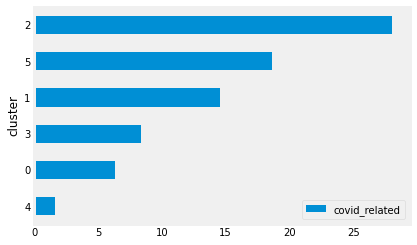

In [15]:
cluster_pct = docs[['cluster', 'covid_related']].groupby('cluster').sum() * 100 / \
                    docs[['cluster', 'covid_related']].groupby('cluster').count()
import matplotlib.style as style
style.use('fivethirtyeight')
cluster_pct.sort_values('covid_related').plot.barh(grid=False);

### Top Cluster

In [16]:
top_cluster = cluster_pct[cluster_pct.covid_related ==cluster_pct.covid_related.max()].index[0]
pd.options.display.max_rows = 400

In [ ]:
a = 'time ; well; spent'
a.partition(';')